# Shopify DataScience Intership Challenge

## Question 1: 
Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

b. What metric would you report for this dataset?

c.What is its value?


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading file and preparing dataframe
cols = ['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items', 
        'payment_method', 'created_at']

df = pd.read_csv('./2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv', names=cols, na_values = "?",
                 comment = '\t', sep =",", skiprows = 1)

data = df.copy()
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


#### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

Calculating the Average order value AOV = Total revenue / number of orders

In [3]:
total_amount = data['order_amount'].sum()
number_of_orders = len(data)
AOV = total_amount/number_of_orders
AOV

3145.128

The AOV = $3145.128 is very high.

Lets check the distribution of the order_amount variable

In [4]:
print(data['order_amount'].describe())

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64


The standar deviation of the variable is very high and the quantiles are not uniformly distributed, specially the last one is huge compared to the first three.


To check the relevance of the calculated AOV we can explore the distribution of the order_amount variable using a boxplot

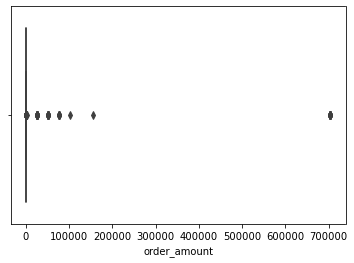

In [5]:
sns.boxplot(x=data['order_amount'])
plt.show()

Here we can see that the order_amount variable hassome outliers, specially there are some values around the $700000 that very far away from the calculated first and second quartiles.

#### b. What metric would you report for this dataset?

Without going further in the analysis of the data a better option to evaluate the data of order_amount could be using the **median** that is less sensible to outliers and gives a better and more useful understanding of the behaviour of order_amount variable.

#### c.What is its value?

In [6]:
data['order_amount'].median()

284.0

The result for the **median for the order_amount variable is $284**, this value is more reasonable than the AOV calculated before. The diference between this two values also gives an insight of how much the outliers affect the calculated average.

## Extra comments about the data

### Comment 1

Going deeper on the data one can ask about the characteristics of the outliers to consider if they should be treated in a different way, perhaps, there is some useful information to focus different merchadizing strategies for those cases.

An interesting variable could be the ammount of products ordered. A BoxPlot of the total_items variable would tell us about it.

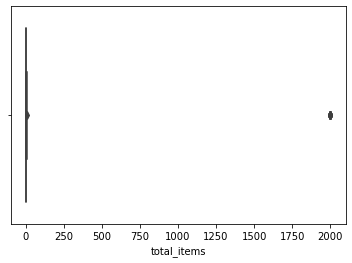

In [7]:
#What about number of items per order
sns.boxplot(x=data['total_items'])
plt.show()

Once again a very stong outlier ordering near 2000 shoes is found, lets exclude the values over 100 ordered shoes just to understand the distribution of items ordered per order.

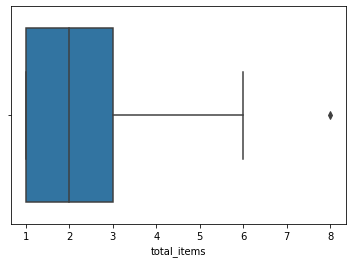

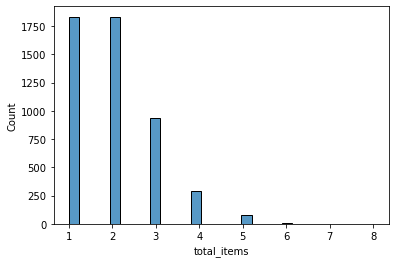

In [8]:
cut_value = 100
data2 = data[data['total_items'] < cut_value]
sns.boxplot(x=data2['total_items'])
plt.show()
sns.histplot(x=data2['total_items'])
plt.show()

We can obtain a list of the costumers than order more than 10 sneakers

In [9]:
big_buyers = data[data['total_items'] > 10]
print("Number of big orders:",len(big_buyers))
print("List of big buyers:",big_buyers.user_id.unique())

Number of big orders: 17
List of big buyers: [607]


It came to be that there is only a customer (id 607) making 17 big orders a month.

### Comment 2

Another interesting variable could be the value of the product each store sells, perhaps a store works with a luxury item that should not be treated as a normal sneaker and should not be included in the assumption:

"Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis."

Getting the value of the shoe each store sells

In [10]:
data['price_per_item'] = data['order_amount']/data['total_items']
data_prices = data[['shop_id', 'price_per_item']].drop_duplicates(subset=['shop_id'], keep='first').copy()
print(data_prices)

     shop_id  price_per_item
0         53           112.0
1         92            90.0
2         44           144.0
3         18           156.0
5         58           138.0
..       ...             ...
280       90           178.0
304       94           134.0
394       46           166.0
461       65           154.0
561       45           142.0

[100 rows x 2 columns]


In [11]:
print(data['price_per_item'].describe())

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: price_per_item, dtype: float64


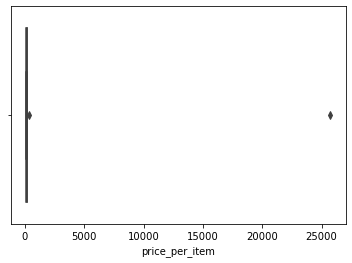

In [15]:
sns.boxplot(x=data_prices['price_per_item'])
plt.show()


There are also some outliers, specially there is one store that sell items that cost more than $2500. This special store and the customers that order from it should be also studied as special cases.

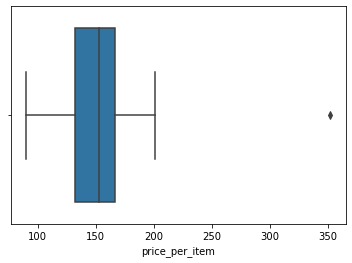

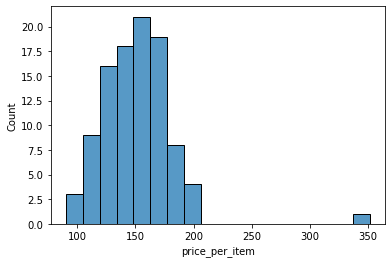

In [13]:
cut_value = 1000
data3 = data_prices[data_prices['price_per_item'] < cut_value]
sns.boxplot(x=data3['price_per_item'])
plt.show()
sns.histplot(x=data3['price_per_item'])
plt.show()

The former boxplot and histogram show that the mean value per shoe is $150.